In [73]:
!pip install tensorflow


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [75]:
import pandas as pd

df = pd.read_csv("hf://datasets/d0r1h/customer_churn/churn.csv")

In [91]:
df.head()
df.drop_duplicates( inplace = True)
df.dropna(inplace = True)

In [92]:
x = df.iloc[:,[0,1,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19]]

In [93]:
x

,age,gender,region_category,membership_category,joining_date,joined_through_referral,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint
0,18,F,Village,Platinum Membership,17-08-2017,No,?,Wi-Fi,16:08:02,17,300.630000,53005.25,17,781.750000,Yes,Yes,No
2,44,F,Town,No Membership,11-11-2016,Yes,Desktop,Wi-Fi,22:53:21,14,516.160000,21027.00,22,500.690000,No,Yes,Yes
3,37,M,City,No Membership,29-10-2016,Yes,Desktop,Mobile_Data,15:57:50,11,53.270000,25239.56,6,567.660000,No,Yes,Yes
4,31,F,City,No Membership,12-09-2017,No,Smartphone,Mobile_Data,15:46:44,20,113.130000,24483.66,16,663.060000,No,Yes,Yes
5,13,M,City,Gold Membership,08-01-2016,No,?,Wi-Fi,6:46:07,23,433.620000,13884.77,24,722.270000,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,F,Village,Premium Membership,25-10-2016,No,Desktop,Fiber_Optic,3:30:17,13,418.380000,56397.21,7,725.890000,Yes,Yes,Yes
36986,27,M,Town,Platinum Membership,07-09-2015,Yes,Desktop,Mobile_Data,5:29:19,13,135.830000,8225.68,16,748.570000,Yes,No,No
36988,29,F,Town,Basic Membership,27-06-2016,No,Smartphone,Wi-Fi,23:18:31,13,-638.123421,11069.71,28,527.990000,Yes,No,No
36990,53,M,Village,Platinum Membership,15-06-2017,No,Smartphone,Mobile_Data,9:50:03,15,482.610000,2378.86,20,197.264414,Yes,Yes,No


In [94]:
y = df.iloc[:,-1]

In [95]:
y

,churn_risk_score
0,0
2,1
3,1
4,1
5,0
...,...
36985,0
36986,0
36988,1
36990,0


In [96]:
##feature engineering
data_category = pd.get_dummies(x.iloc[:,[1,2,3,5,6,7,14,15,16]],drop_first = True)
data_category

,gender_M,gender_Unknown,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_No,joined_through_referral_Yes,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes
0,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False
2,False,False,True,False,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True
3,True,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,False,True,True
4,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False,False,True,True
5,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True,True
36986,True,False,True,False,False,False,True,False,False,False,True,False,True,False,True,False,True,False,False
36988,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False
36990,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False,True,True,False


In [97]:
x = x.drop(['avg_frequency_login_days','joining_date','last_visit_time','gender',	'region_category',	'membership_category'		,'joined_through_referral'	,'medium_of_operation'	,'internet_option',			'used_special_discount',	'offer_application_preference',	'past_complaint'],axis = 1)

In [98]:
x

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet
0,18,17,300.630000,53005.25,781.750000
2,44,14,516.160000,21027.00,500.690000
3,37,11,53.270000,25239.56,567.660000
4,31,20,113.130000,24483.66,663.060000
5,13,23,433.620000,13884.77,722.270000
...,...,...,...,...,...
36985,12,13,418.380000,56397.21,725.890000
36986,27,13,135.830000,8225.68,748.570000
36988,29,13,-638.123421,11069.71,527.990000
36990,53,15,482.610000,2378.86,197.264414


In [99]:
x = pd.concat([x,data_category],axis = 1)

In [100]:
x

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,gender_M,gender_Unknown,region_category_Town,region_category_Village,membership_category_Gold Membership,...,joined_through_referral_No,joined_through_referral_Yes,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes
0,18,17,300.630000,53005.25,781.750000,False,False,False,True,False,...,True,False,False,False,False,False,True,True,True,False
2,44,14,516.160000,21027.00,500.690000,False,False,True,False,False,...,False,True,False,True,False,False,True,False,True,True
3,37,11,53.270000,25239.56,567.660000,True,False,False,False,False,...,False,True,False,True,False,True,False,False,True,True
4,31,20,113.130000,24483.66,663.060000,False,False,False,False,False,...,True,False,False,False,True,True,False,False,True,True
5,13,23,433.620000,13884.77,722.270000,True,False,False,False,True,...,True,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36985,12,13,418.380000,56397.21,725.890000,False,False,False,True,False,...,True,False,False,True,False,False,False,True,True,True
36986,27,13,135.830000,8225.68,748.570000,True,False,True,False,False,...,False,True,False,True,False,True,False,True,False,False
36988,29,13,-638.123421,11069.71,527.990000,False,False,True,False,False,...,True,False,False,False,True,False,True,True,False,False
36990,53,15,482.610000,2378.86,197.264414,True,False,False,True,False,...,True,False,False,False,True,True,False,True,True,False


In [101]:
from sklearn.model_selection import train_test_split


In [102]:
x_train,x_test ,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 35)

In [103]:
#feature_scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [104]:
x_train.shape

(22698, 24)

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [109]:
classifier = Sequential()

In [110]:
classifier.add(Dense(units = 24,activation = 'relu'))
classifier.add(Dense(units = 24,activation = 'relu'))
classifier.add(Dense(units = 24,activation = 'relu'))
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [111]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [114]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# classifier.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

In [115]:

from tensorflow.keras.callbacks import EarlyStopping # Import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs with no improvement
    restore_best_weights=True  # Restore weights from the best epoch
)

# Fit the model with the EarlyStopping callback
model_history = classifier.fit(
    x_train,
    y_train,
    epochs=100,  # Set a large number of epochs, early stopping will handle it
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]  # Pass the callback to the fit method
)

Epoch 1/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7570 - loss: 0.4610 - val_accuracy: 0.8634 - val_loss: 0.2781
Epoch 2/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8647 - loss: 0.2852 - val_accuracy: 0.8758 - val_loss: 0.2694
Epoch 3/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8838 - loss: 0.2634 - val_accuracy: 0.8899 - val_loss: 0.2538
Epoch 4/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9084 - loss: 0.2412 - val_accuracy: 0.9239 - val_loss: 0.2045
Epoch 5/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.1946 - val_accuracy: 0.9256 - val_loss: 0.1793
Epoch 6/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9296 - loss: 0.1737 - val_accuracy: 0.9255 - val_loss: 0.1726
Epoch 7/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9335 - loss: 0.1646 - val_accuracy: 0.9337 - val_loss: 0.1619
Epoch 8/100
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9354 - loss: 0.1606 - val_accu

In [116]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

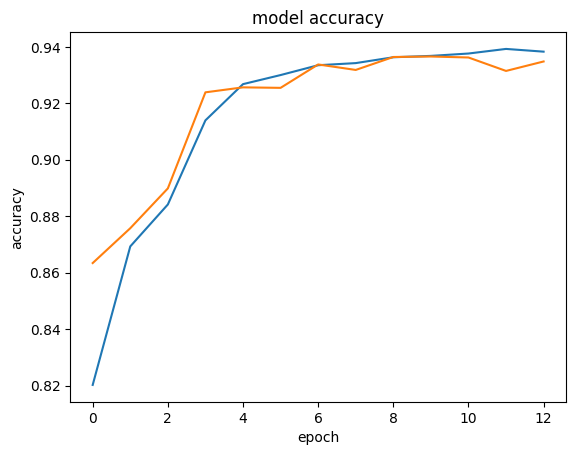

In [117]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt

Text(0.5, 0, 'epoch')

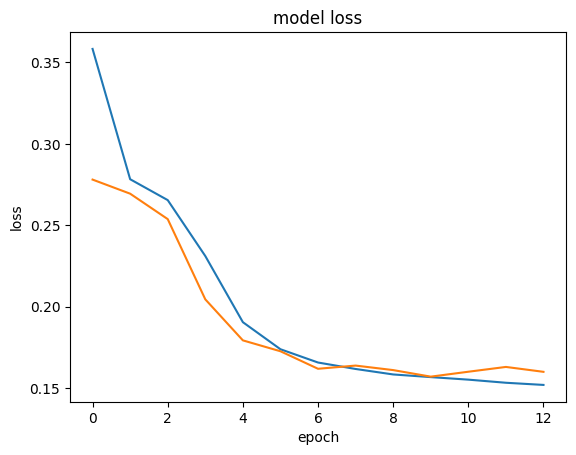

In [118]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [119]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [120]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[2436,  199],
       [ 161, 2879]])

In [121]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.9365638766519824

In [122]:
classifier.save('customer_churn.h5')

In [123]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,477 (21.40 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,652 (14.27 KB)

In [125]:
classifier.get_weights()

[array([[ 1.60515323e-01, -2.88954109e-01, -1.28407195e-01,
         -2.15381965e-01, -6.98701367e-02,  3.07897050e-02,
          3.16969939e-02,  1.06928490e-01, -7.48828705e-03,
          2.26817951e-01, -2.61120852e-02,  1.00065336e-01,
         -1.23282418e-01,  1.86189204e-01,  6.44631684e-02,
          2.49390099e-02, -1.40172258e-01,  9.95095670e-02,
         -7.92675838e-03, -6.03659488e-02,  1.21615315e-03,
          1.62957609e-01,  3.60457115e-02,  2.00933535e-02],
        [-9.58215073e-02,  1.14878409e-01, -1.38128415e-01,
         -6.13107048e-02, -1.40370518e-01,  2.74192512e-01,
         -2.38812435e-02,  1.44169284e-02, -7.08641410e-02,
         -2.32760124e-02,  6.69572726e-02,  3.71383056e-02,
         -1.97887495e-01,  5.97997010e-02, -2.59511340e-02,
          2.40985565e-02, -2.03814711e-02,  1.09374173e-01,
          2.39427567e-01, -1.31010488e-01, -7.80657828e-02,
          2.41589874e-01, -1.61537126e-01, -8.31183046e-03],
        [ 3.61583121e-02,  2.03425601e

In [ ]:
# prompt: write me complete read_me file text for this model

# Customer Churn Prediction Model

This repository contains a machine learning model for predicting customer churn.  The model is built using a neural network implemented with TensorFlow/Keras and trained on a customer churn dataset.

## Model Overview

The model utilizes a multi-layer perceptron (MLP) to classify customers as either likely to churn or not.  Preprocessing steps include handling missing values, one-hot encoding categorical features, and feature scaling.  Early stopping is used during training to prevent overfitting.

## Dataset

The model is trained on the "customer_churn" dataset (presumably from Hugging Face Datasets).  Key features include demographics, usage patterns, and customer engagement metrics.

## Dependencies

- pandas
- numpy
- matplotlib
- scikit-learn
- TensorFlow/Keras

To install the necessary libraries, run:
